In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [476]:
import numpy as np
import SimpleITK as sitk
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


os.listdir('./datasets')

['brats2015_testing_crop_mri.tfrecords',
 'VSD.Brain_3more.XX.O.OT.42291',
 'dataset_helpers.py',
 'tfrecord.ipynb',
 '.DS_Store',
 'brats2015_validation_crop_mri.tfrecords',
 'VSD.Brain.XX.O.MR_T2.54515.mha',
 'VSD.Brain.XX.O.MR_Flair.35541',
 'VSD.Brain.XX.O.MR_T1.35544',
 'brats2015_training_crop_mri.tfrecords',
 'VSD.Brain.XX.O.MR_T2.35542',
 'VSD.Brain.XX.O.MR_T1c.35543',
 'Test.ipynb']

In [514]:
path = './datasets/VSD.Brain.XX.O.MR_T2.54515.mha'

In [515]:
def load_itk(filename):
    ''' Read an .mha image and returns a numpy array, the origin coordinates and the voxel sizes in mm '''
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,x,y
    image = sitk.GetArrayFromImage(itkimage)
    # Here we have (z, y, x).
    image = image.transpose((0, 2, 1))

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(itkimage.GetOrigin())[[2,0,1]]

    # Read the spacing along each dimension
    spacing = np.array(itkimage.GetSpacing())[[2,0,1]]

    return image, origin, spacing


In [516]:
image, origin, spacing = load_itk(path)

In [517]:
image.dtype

dtype('int16')

In [518]:
print('z dimension:', image.shape[0])
print('x dimension:', image.shape[1])
print('y dimension:', image.shape[2])
print('z origin:', origin[0])
print('x origin:', origin[1])
print('y origin:', origin[2])
print('z spacing:', spacing[0])
print('x spacing:', spacing[1])
print('y spacing:', spacing[2])
print('mri_max:', image.max().astype(np.float32))
print('mri_min:', image.min().astype(np.float32))
print('mri_lperc and mri_hperc: ', np.percentile(image, percentiles).astype(np.float32))

z dimension: 155
x dimension: 240
y dimension: 240
z origin: 0.0
x origin: 0.0
y origin: -239.0
z spacing: 1.0
x spacing: 1.0
y spacing: 1.0
mri_max: 1584.0
mri_min: 0.0
mri_lperc and mri_hperc:  [  0. 664.]


In [519]:
old = image

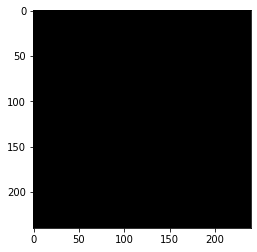

In [520]:
img = old[0,:,:]

imgplot = plt.imshow(img, cmap='gray')

In [521]:
min_value, max_value

(0.0, 414.0)

In [522]:
def rescale(x, xmin, xmax, a, b):
    ''' Rescales x from range (xmin, xmax) to an y in (a, b)'''
    return (a + (b-a)*(x-xmin)/(xmax-xmin))  

center_crop=[180,180,128]
normalize_to='mri'
#dataset_min=train_min, dataset_max=train_max


if center_crop:
    image = image[int(image.shape[0] / 2 - center_crop[2] / 2):int(image.shape[0] / 2 + center_crop[2] / 2),
            int(image.shape[1] / 2 - center_crop[0] / 2):int(image.shape[1] / 2 + center_crop[0] / 2),
            int(image.shape[2] / 2 - center_crop[1] / 2):int(image.shape[2] / 2 + center_crop[1] / 2)]
min_value, max_value = np.percentile(image, percentiles).astype(np.float32)
percentiles=[2, 98]
image = rescale(image, min_value, max_value, 0, 1)

# Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval 
# of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
image = np.clip(image, 0, 1)

image.dtype


dtype('float32')

In [523]:
percentiles=[2, 98]

print('z dimension:', image.shape[0])
print('x dimension:', image.shape[1])
print('y dimension:', image.shape[2])
print('z origin:', origin[0])
print('x origin:', origin[1])
print('y origin:', origin[2])
print('z spacing:', spacing[0])
print('x spacing:', spacing[1])
print('y spacing:', spacing[2])
print('mri_max:', image.max().astype(np.float32))
print('mri_min:', image.min().astype(np.float32))
print('mri_lperc and mri_hperc: ', np.percentile(image, percentiles).astype(np.float32))

z dimension: 128
x dimension: 180
y dimension: 180
z origin: 0.0
x origin: 0.0
y origin: -239.0
z spacing: 1.0
x spacing: 1.0
y spacing: 1.0
mri_max: 1.0
mri_min: 0.0
mri_lperc and mri_hperc:  [0. 1.]


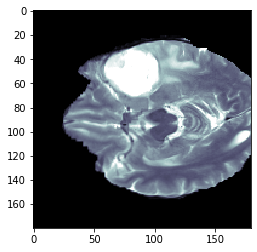

In [524]:
img = image[45]

imgplot = plt.imshow(X=img, cmap='bone')


# Removed all the brain scan images that weren't needed. The firsts and the lasts scans in the z-dimension 
# were useless since, being a 3D scan, they were the top and the bottom of the brain (not the whole surface)
# so I did this in order to remove black regions and keep only the relevant parts of the brain

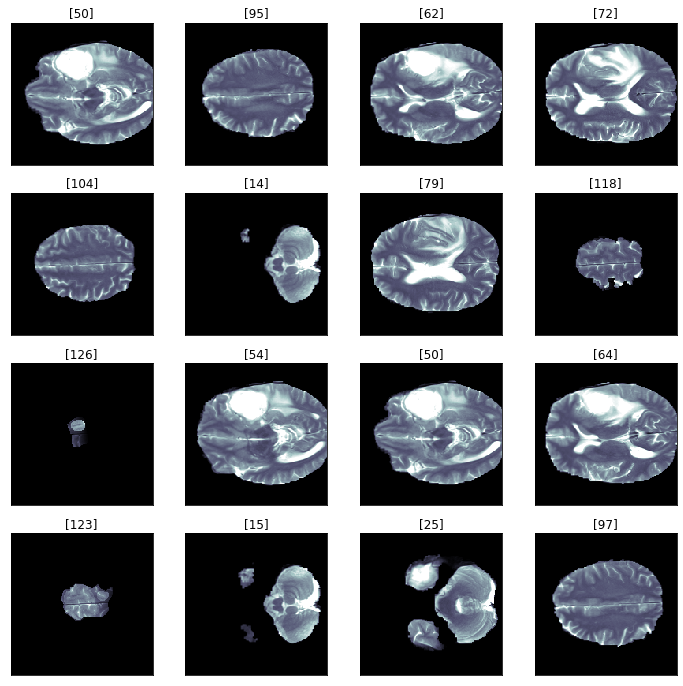

In [525]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1 , figsize = (12 , 12))
n = 0
for i in range(16):
    n += 1 
    r = np.random.randint(0 , image.shape[0] , 1)
    plt.subplot(4 , 4 , n)
    plt.imshow(image[r[0]],cmap='bone')
    plt.title('{}'.format(r))
    plt.xticks([]) , plt.yticks([])

In [526]:
image[0][0][0]

0.0

In [527]:
type(image)

numpy.ndarray

In [528]:
type(image[0][0][0])

numpy.float32

In [529]:
image.size

4147200

In [530]:
image.shape

(128, 180, 180)

In [531]:
os.listdir('./datasets')

['brats2015_testing_crop_mri.tfrecords',
 'VSD.Brain_3more.XX.O.OT.42291',
 'dataset_helpers.py',
 'tfrecord.ipynb',
 '.DS_Store',
 'brats2015_validation_crop_mri.tfrecords',
 'VSD.Brain.XX.O.MR_T2.54515.mha',
 'VSD.Brain.XX.O.MR_Flair.35541',
 'VSD.Brain.XX.O.MR_T1.35544',
 'brats2015_training_crop_mri.tfrecords',
 'VSD.Brain.XX.O.MR_T2.35542',
 'VSD.Brain.XX.O.MR_T1c.35543',
 'Test.ipynb']

In [532]:
OT = './datasets/VSD.Brain_3more.XX.O.OT.42291/VSD.Brain_3more.XX.O.OT.42291.mha'
OT

'./datasets/VSD.Brain_3more.XX.O.OT.42291/VSD.Brain_3more.XX.O.OT.42291.mha'

In [533]:
T1 = './datasets/VSD.Brain.XX.O.MR_T1.35544/VSD.Brain.XX.O.MR_T1.35544.mha'
T1

'./datasets/VSD.Brain.XX.O.MR_T1.35544/VSD.Brain.XX.O.MR_T1.35544.mha'

In [534]:
T1c = './datasets/VSD.Brain.XX.O.MR_T1c.35543/VSD.Brain.XX.O.MR_T1c.35543.mha'
T1c

'./datasets/VSD.Brain.XX.O.MR_T1c.35543/VSD.Brain.XX.O.MR_T1c.35543.mha'

In [535]:
T2 = './datasets/VSD.Brain.XX.O.MR_T2.35542/VSD.Brain.XX.O.MR_T2.35542.mha'
T2

'./datasets/VSD.Brain.XX.O.MR_T2.35542/VSD.Brain.XX.O.MR_T2.35542.mha'

In [536]:
TFlair = './datasets/VSD.Brain.XX.O.MR_Flair.35541/VSD.Brain.XX.O.MR_Flair.35541.mha'
TFlair

'./datasets/VSD.Brain.XX.O.MR_Flair.35541/VSD.Brain.XX.O.MR_Flair.35541.mha'

Modalities: 


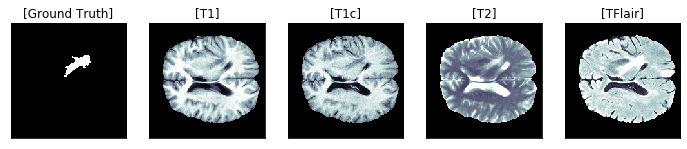

In [537]:
images = [OT, T1, T1c, T2, TFlair]

plt.figure(1 , figsize = (12 , 12))
n = 0
percentiles=[2, 98]

print("Modalities: ")
for idx, element in enumerate(images):
    image, origin, spacing = load_itk(element)
    
    if center_crop:
        image = image[int(image.shape[0] / 2 - center_crop[2] / 2):int(image.shape[0] / 2 + center_crop[2] / 2),
                int(image.shape[1] / 2 - center_crop[0] / 2):int(image.shape[1] / 2 + center_crop[0] / 2),
                int(image.shape[2] / 2 - center_crop[1] / 2):int(image.shape[2] / 2 + center_crop[1] / 2)]
    min_value, max_value = np.percentile(image, percentiles).astype(np.float32)
    image = rescale(image, min_value, max_value, 0, 1)
    

    # Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval 
    # of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
    image = np.clip(image, 0, 1)
    image = image[70]

    n += 1 
    plt.subplot(1 , 5, n)
    plt.imshow(image, cmap='bone')
    
    if idx == 0: 
        str = 'Ground Truth' 
    elif idx == 1: 
        str = 'T1' 
    elif idx == 2: 
        str = 'T1c'
    elif idx == 3: 
        str = 'T2'
    elif idx == 4: 
        str = 'TFlair'
    plt.title('[{}]'.format(str))
    plt.xticks([]) , plt.yticks([])
    
    